In [1]:
import numpy as np
print('numpy version:', np.__version__)

import matplotlib as mpl
print('matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt

# custom packages
import kmeans
import common
import naive_em
import em
from common import GaussianMixture

from scipy.special import logsumexp

numpy version: 1.23.5
matplotlib version: 3.6.2


In [2]:
# !!! "MAGIC" RELOAD of changed modules 
%reload_ext autoreload
%autoreload 2

In [3]:
X = np.loadtxt('toy_data.txt')

In [4]:
X.shape

(250, 2)

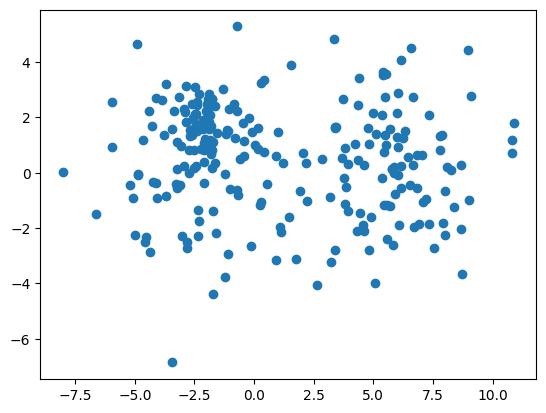

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
res = common.init(X=X, K=2, seed=42974)

In [7]:
res[0]

GaussianMixture(mu=array([[ 7.987, -2.235],
       [-3.674, -0.838]]), var=array([38.7634276 , 23.11463346]), p=array([0.5, 0.5]))

In [8]:
res[1].shape

(250, 2)

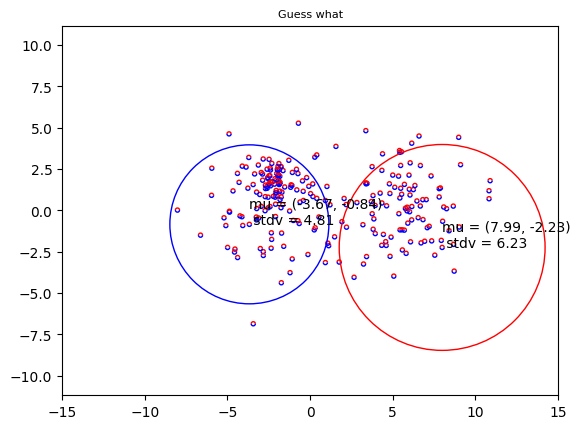

In [9]:
common.plot(X=X, mixture=res[0], post=res[1], title='Guess what')

In [10]:
def get_cost_kmeans(X, mixture: GaussianMixture):
    """
    Returns cost as sum of minimal distances to cluster centers
    """
    n = X.shape[0]
    K = mixture.mu.shape[0]
    cost = 0
    for i in range(n):
        tiled_vector = np.tile(X[i, :], (K, 1))
        sse = ((tiled_vector - mixture.mu)**2).sum(axis=1)
        cost += np.min(sse)
    return cost

In [11]:
tiled_vector = np.tile(X[0, :], (res[0].mu.shape[0], 1))
tiled_vector

array([[-1.636,  2.413],
       [-1.636,  2.413]])

In [12]:
sse = ((tiled_vector - res[0].mu)**2).sum(axis=1)
sse

array([114.206033,  14.722445])

In [13]:
np.min(sse)

14.722445

In [14]:
get_cost_kmeans(X, res[0])

3516.008191

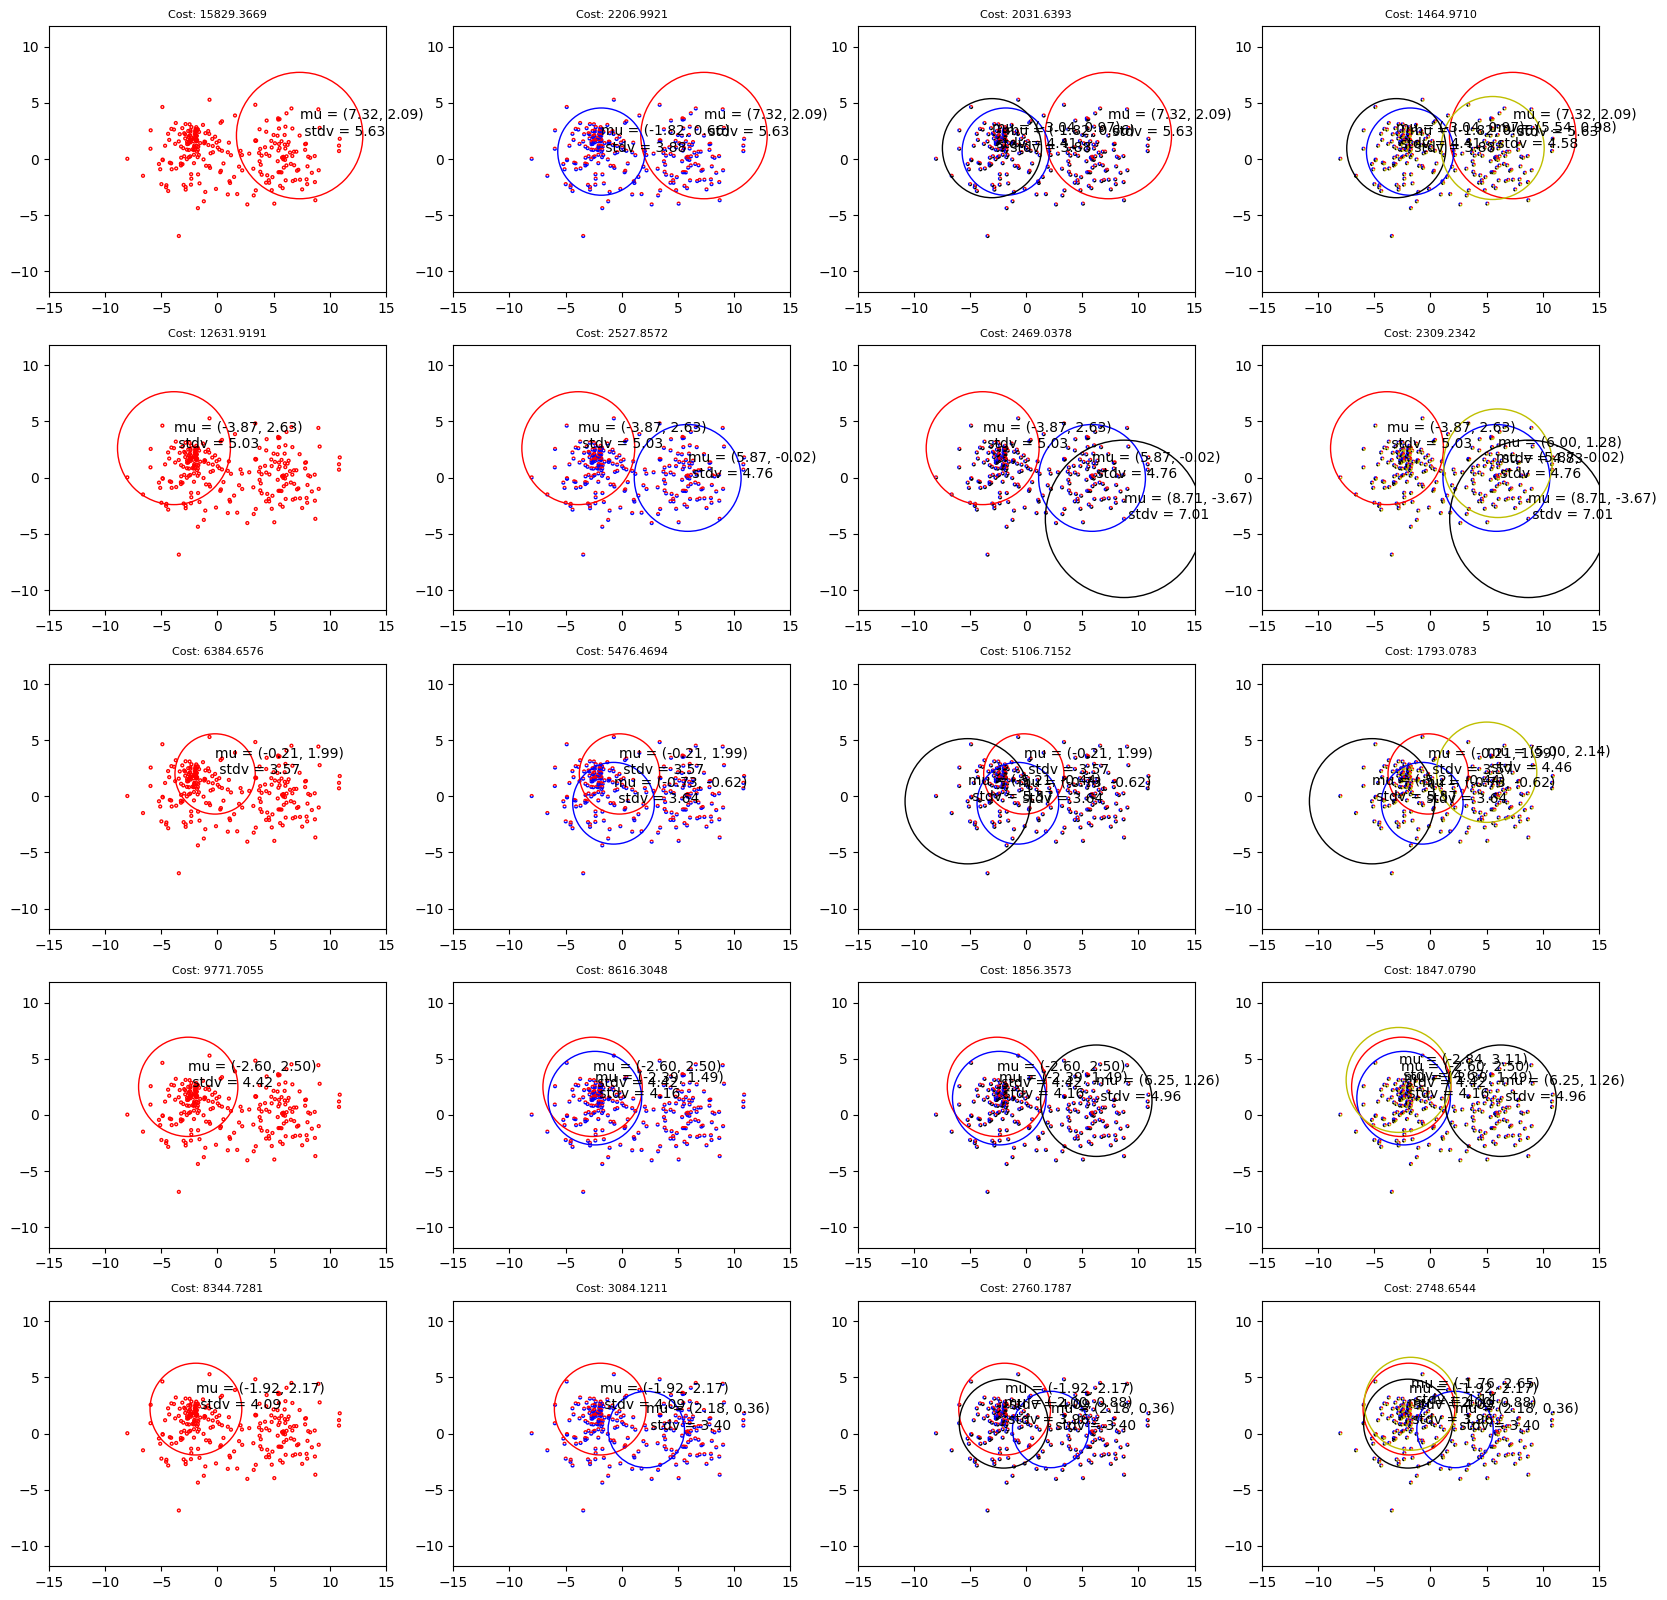

In [15]:
# the task is to use K=range(1, 5) and seed=range(5) and select the one that minimizes the total cost
ks = list(range(1,5))
seeds = list(range(5))

fig, axs = plt.subplots(len(seeds), len(ks), figsize=(5*len(ks), 4*len(seeds)))
min_costs = {k: None for k in ks}
min_seeds = {k: None for k in ks}
for k in ks:
    for seed in seeds:
        res = common.init(X=X, K=k, seed=seed)
        cost = get_cost_kmeans(X, res[0])
        if min_costs[k] is None:
            min_costs[k] = cost
            min_seeds[k] = seed
        elif cost < min_costs[k]:
            min_costs[k] = cost
            min_seeds[k] = seed
        common.plot(X=X, mixture=res[0], post=res[1], title=f'Cost: {cost:.4f}', ax=axs[seed, k-1])

In [16]:
min_costs

{1: 6384.657576999999,
 2: 2206.9921369999993,
 3: 1856.3573110000002,
 4: 1464.9710049999994}

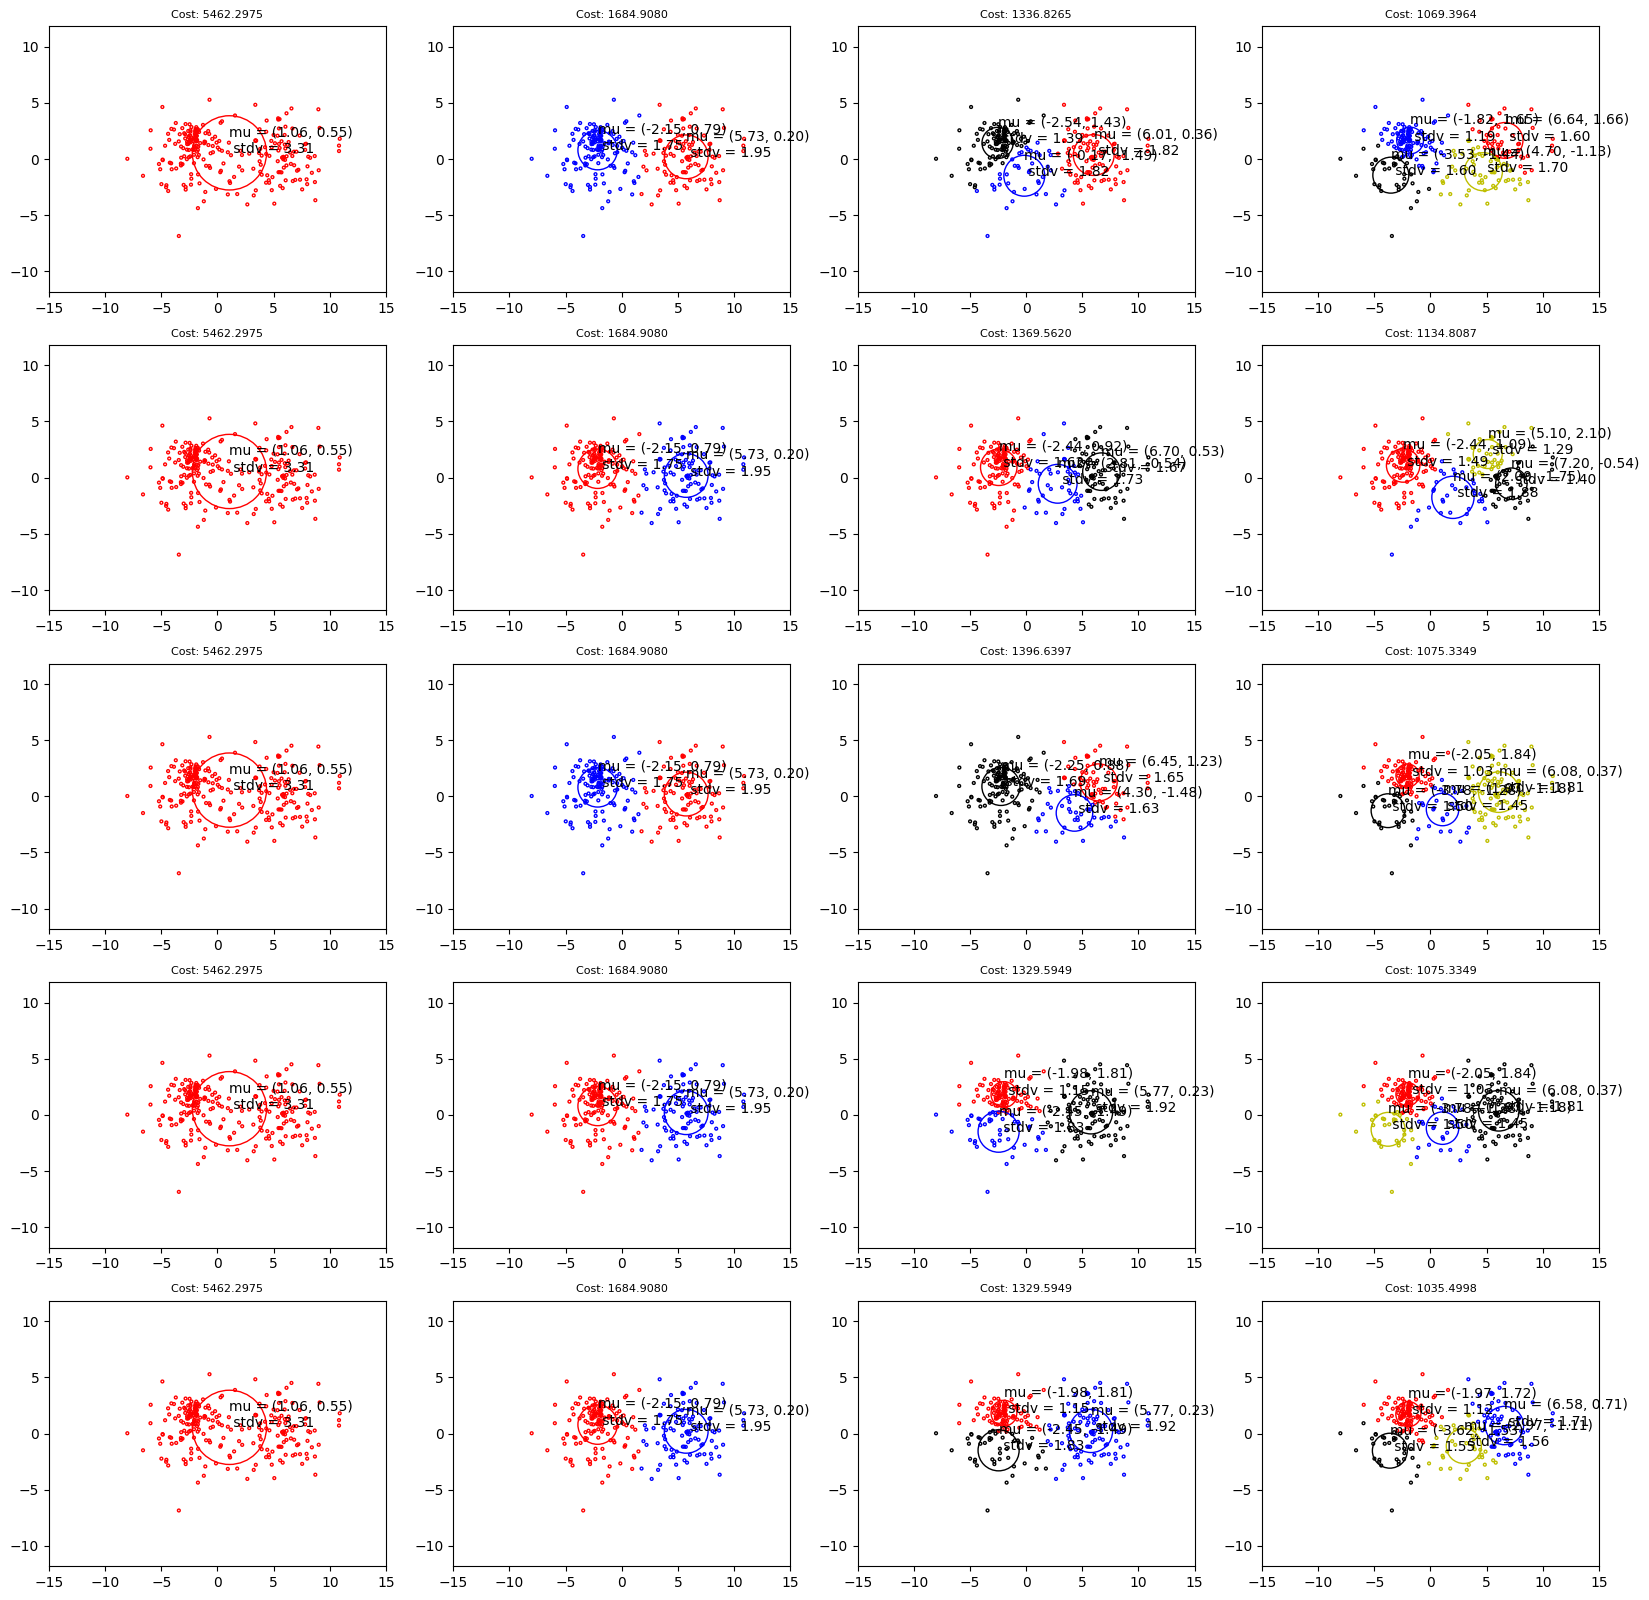

In [17]:
# the task is to use K=range(1, 5) and seed=range(5) and select the one that minimizes the total cost. Here cost is calculated by kmeans.run function
ks = list(range(1,5))
seeds = list(range(5))

fig, axs = plt.subplots(len(seeds), len(ks), figsize=(5*len(ks), 4*len(seeds)))
min_costs = {k: None for k in ks}
min_seeds = {k: None for k in ks}
for k in ks:
    for seed in seeds:
        mixture, post = common.init(X=X, K=k, seed=seed)
        mixture, post, cost = kmeans.run(X, mixture=mixture, post=post)
        if min_costs[k] is None:
            min_costs[k] = cost
            min_seeds[k] = seed
        elif cost < min_costs[k]:
            min_costs[k] = cost
            min_seeds[k] = seed
        common.plot(X=X, mixture=mixture, post=post, title=f'Cost: {cost:.4f}', ax=axs[seed, k-1])

In [18]:
min_costs

{1: 5462.297452340002,
 2: 1684.9079502962372,
 3: 1329.59486715443,
 4: 1035.499826539466}

In [19]:
X[0, :]

array([-1.636,  2.413])

In [20]:
np.tile(X[0, :], (2, 1)) 

array([[-1.636,  2.413],
       [-1.636,  2.413]])

In [21]:
res[0].mu

array([[-1.917,  2.175],
       [ 2.183,  0.358],
       [-1.998,  0.881],
       [-1.762,  2.649]])

In [22]:
kmeans.estep(X, res[0]).shape

(250, 4)

In [23]:
x = np.random.randint(0, 3, size=10)
x

array([0, 0, 1, 2, 1, 2, 1, 2, 0, 0])

In [24]:
np.nonzero(x)

(array([2, 3, 4, 5, 6, 7], dtype=int64),)

In [25]:
x[np.nonzero(x)]

array([1, 2, 1, 2, 1, 2])

In [26]:
x = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
x

array([[3, 0, 0],
       [0, 4, 0],
       [5, 6, 0]])

In [27]:
nz = np.nonzero(x)
nz

(array([0, 1, 2, 2], dtype=int64), array([0, 1, 0, 1], dtype=int64))

In [28]:
mask = np.where(x == 0, True, False)
mask

array([[False,  True,  True],
       [ True, False,  True],
       [False, False,  True]])

In [29]:
x[:, nz[1]]

array([[3, 0, 3, 0],
       [0, 4, 0, 4],
       [5, 6, 5, 6]])

In [30]:
X = np.random.randint(0, 4, size=4*5).reshape(5, -1)
X

array([[3, 1, 3, 3],
       [0, 0, 1, 2],
       [3, 2, 1, 3],
       [3, 3, 1, 2],
       [2, 3, 2, 2]])

In [31]:
# test example from online verifier
X = np.array(
    [[0.50625118, 0.75591786],
    [0.29526732, 0.06400582],
    [0.00977414, 0.56645759],
    [0.04438235, 0.46196997],
    [0.43150022, 0.28965982],
    [0.27164393, 0.31650993],
    [0.37802967, 0.31246379],
    [0.93675432, 0.36497742],
    [0.82592082, 0.50040946],
    [0.03710829, 0.48083358],
    [0.2688344,  0.3556781 ],
    [0.32326011, 0.20987551],
    [0.28440751, 0.58458458],
    [0.42124824, 0.26907756],
    [0.02278496, 0.45913605],
    [0.16705424, 0.4191721 ],
    [0.35834447, 0.35435155],
    [0.91516533, 0.1326612 ]]
)

In [32]:
n, d = X.shape
print(n, d)

18 2


In [33]:
K = 3
mix = GaussianMixture(
    p=np.array([0.33, 0.33, 0.34]),
    mu=np.random.rand(K, d) * 4,
    var=np.random.rand(K)
)
mix

GaussianMixture(mu=array([[1.62303684, 3.88681329],
       [0.17569003, 1.14097839],
       [1.08185629, 1.85139902]]), var=array([0.42479225, 0.75564928, 0.25149846]), p=array([0.33, 0.33, 0.34]))

In [34]:
mix = GaussianMixture(
    p=np.array([0.12070114, 0.11817345, 0.08544122, 0.12722846, 0.08861927, 0.10902522, 0.11384529, 0.10445905, 0.1325069]),
    mu=np.array(
        [[ 0.41564297, -0.74271051],
        [-0.69575741, -0.63401876],
        [ 0.46836261,  0.11571339],
        [-0.61888701, -0.46846218],
        [-0.27153504,  0.04056153],
        [-0.04649282,  0.25768572],
        [-0.88476825,  0.64835765],
        [-0.775763,    0.84873612],
        [ 0.43849991,  0.21500109]]
    ),
    var=np.array([0.68730601, 1.12769352, 0.09350777, 0.89471176, 0.31071027, 0.14286318, 0.86306904, 0.80642252, 0.06911719])
)

In [35]:
post, LL = naive_em.estep(X=X, mixture=mix)
post

array([[0.05171114, 0.03558672, 0.15376988, 0.04602616, 0.07176811,
        0.16675918, 0.06482055, 0.07057971, 0.33897856],
       [0.03475655, 0.01754096, 0.24643154, 0.02443063, 0.05456688,
        0.14279797, 0.01551221, 0.01394266, 0.45002061],
       [0.03372127, 0.03340844, 0.07542558, 0.04719743, 0.12118954,
        0.40715879, 0.06224922, 0.06333606, 0.15631366],
       [0.03183127, 0.02779029, 0.10599949, 0.03947961, 0.10511433,
        0.36895395, 0.04515101, 0.04480534, 0.23087471],
       [0.02423883, 0.01224925, 0.23128855, 0.0166874 , 0.03492512,
        0.10245415, 0.0134506 , 0.01295724, 0.55174887],
       [0.02516331, 0.01525344, 0.19703711, 0.0212866 , 0.05163957,
        0.17407463, 0.01876411, 0.0181103 , 0.47867094],
       [0.02394451, 0.0129617 , 0.21818822, 0.01780497, 0.03939871,
        0.12330339, 0.01504961, 0.01456583, 0.53478306],
       [0.08913928, 0.0311833 , 0.30620235, 0.03766414, 0.03469302,
        0.03754887, 0.02781164, 0.027455  , 0.40830241],


In [36]:
# correct value of LL: -21.878063
LL

-21.878062713852948

In [37]:
np.exp(-21.878063)

3.1512144869375943e-10

In [38]:
((X[0] - mix.mu)**2).sum(axis=1) * post[0]

array([0.11656192, 0.1201674 , 0.06324514, 0.12726427, 0.08014245,
       0.09234476, 0.12617347, 0.11661007, 0.10073805])

In [39]:
new_mix = naive_em.mstep(X=X, post=post)
new_mix

GaussianMixture(mu=array([[0.48327857, 0.38011347],
       [0.36946518, 0.41845909],
       [0.45278169, 0.34472224],
       [0.35183607, 0.41927493],
       [0.2611876 , 0.42512671],
       [0.20810634, 0.43156453],
       [0.30674672, 0.45857663],
       [0.30721633, 0.46566477],
       [0.40084284, 0.35635165]]), var=array([0.07296783, 0.06551697, 0.05514421, 0.06297921, 0.04552564,
       0.03154727, 0.05614677, 0.05587458, 0.04485554]), p=array([0.03862647, 0.02211235, 0.1949844 , 0.02986519, 0.06224115,
       0.19028451, 0.03006009, 0.0300789 , 0.40174694]))

In [40]:
np.nonzero(X[0])

(array([0, 1], dtype=int64),)

In [41]:
mix.mu[:, np.nonzero(X[0])[0]]

array([[ 0.41564297, -0.74271051],
       [-0.69575741, -0.63401876],
       [ 0.46836261,  0.11571339],
       [-0.61888701, -0.46846218],
       [-0.27153504,  0.04056153],
       [-0.04649282,  0.25768572],
       [-0.88476825,  0.64835765],
       [-0.775763  ,  0.84873612],
       [ 0.43849991,  0.21500109]])

In [42]:
mix.mu[:, np.nonzero(x[0])]

array([[[ 0.41564297]],

       [[-0.69575741]],

       [[ 0.46836261]],

       [[-0.61888701]],

       [[-0.27153504]],

       [[-0.04649282]],

       [[-0.88476825]],

       [[-0.775763  ]],

       [[ 0.43849991]]])

In [43]:
naive_em.get_likelihood(X=X, mixture=mix)

array([[0.00542279, 0.00373187, 0.01612538, 0.00482662, 0.0075261 ,
        0.01748753, 0.00679753, 0.00740148, 0.03554764],
       [0.01722632, 0.00869379, 0.12213838, 0.0121085 , 0.02704487,
        0.07077468, 0.00768828, 0.00691037, 0.22304282],
       [0.00712592, 0.00705981, 0.0159388 , 0.00997368, 0.02560957,
        0.0860401 , 0.0131544 , 0.01338407, 0.03303194],
       [0.0087968 , 0.00768005, 0.02929373, 0.01091048, 0.02904911,
        0.10196312, 0.01247781, 0.01238228, 0.06380391],
       [0.01286996, 0.00650392, 0.12280599, 0.00886042, 0.01854399,
        0.05439951, 0.00714179, 0.00687983, 0.29295902],
       [0.01217201, 0.0073784 , 0.09531089, 0.01029677, 0.02497912,
        0.08420346, 0.00907658, 0.00876032, 0.23154294],
       [0.01242137, 0.00672396, 0.11318655, 0.00923645, 0.02043834,
        0.06396443, 0.00780708, 0.00755612, 0.27742218],
       [0.00939586, 0.00328692, 0.03227571, 0.00397004, 0.00365687,
        0.00395789, 0.00293153, 0.00289393, 0.04303772],


In [44]:
lh = naive_em.get_likelihood(X=X, mixture=mix)
lh

array([[0.00542279, 0.00373187, 0.01612538, 0.00482662, 0.0075261 ,
        0.01748753, 0.00679753, 0.00740148, 0.03554764],
       [0.01722632, 0.00869379, 0.12213838, 0.0121085 , 0.02704487,
        0.07077468, 0.00768828, 0.00691037, 0.22304282],
       [0.00712592, 0.00705981, 0.0159388 , 0.00997368, 0.02560957,
        0.0860401 , 0.0131544 , 0.01338407, 0.03303194],
       [0.0087968 , 0.00768005, 0.02929373, 0.01091048, 0.02904911,
        0.10196312, 0.01247781, 0.01238228, 0.06380391],
       [0.01286996, 0.00650392, 0.12280599, 0.00886042, 0.01854399,
        0.05439951, 0.00714179, 0.00687983, 0.29295902],
       [0.01217201, 0.0073784 , 0.09531089, 0.01029677, 0.02497912,
        0.08420346, 0.00907658, 0.00876032, 0.23154294],
       [0.01242137, 0.00672396, 0.11318655, 0.00923645, 0.02043834,
        0.06396443, 0.00780708, 0.00755612, 0.27742218],
       [0.00939586, 0.00328692, 0.03227571, 0.00397004, 0.00365687,
        0.00395789, 0.00293153, 0.00289393, 0.04303772],


In [45]:
naive_em.get_likelihood(X=X, mixture=mix)

array([[0.00542279, 0.00373187, 0.01612538, 0.00482662, 0.0075261 ,
        0.01748753, 0.00679753, 0.00740148, 0.03554764],
       [0.01722632, 0.00869379, 0.12213838, 0.0121085 , 0.02704487,
        0.07077468, 0.00768828, 0.00691037, 0.22304282],
       [0.00712592, 0.00705981, 0.0159388 , 0.00997368, 0.02560957,
        0.0860401 , 0.0131544 , 0.01338407, 0.03303194],
       [0.0087968 , 0.00768005, 0.02929373, 0.01091048, 0.02904911,
        0.10196312, 0.01247781, 0.01238228, 0.06380391],
       [0.01286996, 0.00650392, 0.12280599, 0.00886042, 0.01854399,
        0.05439951, 0.00714179, 0.00687983, 0.29295902],
       [0.01217201, 0.0073784 , 0.09531089, 0.01029677, 0.02497912,
        0.08420346, 0.00907658, 0.00876032, 0.23154294],
       [0.01242137, 0.00672396, 0.11318655, 0.00923645, 0.02043834,
        0.06396443, 0.00780708, 0.00755612, 0.27742218],
       [0.00939586, 0.00328692, 0.03227571, 0.00397004, 0.00365687,
        0.00395789, 0.00293153, 0.00289393, 0.04303772],


In [46]:
lh / lh.sum(axis=1).reshape(-1, 1)

array([[0.05171114, 0.03558672, 0.15376988, 0.04602616, 0.07176811,
        0.16675918, 0.06482055, 0.07057971, 0.33897856],
       [0.03475655, 0.01754096, 0.24643154, 0.02443063, 0.05456688,
        0.14279797, 0.01551221, 0.01394266, 0.45002061],
       [0.03372127, 0.03340844, 0.07542558, 0.04719743, 0.12118954,
        0.40715879, 0.06224922, 0.06333606, 0.15631366],
       [0.03183127, 0.02779029, 0.10599949, 0.03947961, 0.10511433,
        0.36895395, 0.04515101, 0.04480534, 0.23087471],
       [0.02423883, 0.01224925, 0.23128855, 0.0166874 , 0.03492512,
        0.10245415, 0.0134506 , 0.01295724, 0.55174887],
       [0.02516331, 0.01525344, 0.19703711, 0.0212866 , 0.05163957,
        0.17407463, 0.01876411, 0.0181103 , 0.47867094],
       [0.02394451, 0.0129617 , 0.21818822, 0.01780497, 0.03939871,
        0.12330339, 0.01504961, 0.01456583, 0.53478306],
       [0.08913928, 0.0311833 , 0.30620235, 0.03766414, 0.03469302,
        0.03754887, 0.02781164, 0.027455  , 0.40830241],


In [47]:
(lh / lh.sum(axis=1).reshape(-1, 1)).argmax(axis=1)

array([8, 8, 5, 5, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 5, 8, 8, 8], dtype=int64)

In [48]:
lh / lh.sum(axis=1).reshape(-1, 1)

array([[0.05171114, 0.03558672, 0.15376988, 0.04602616, 0.07176811,
        0.16675918, 0.06482055, 0.07057971, 0.33897856],
       [0.03475655, 0.01754096, 0.24643154, 0.02443063, 0.05456688,
        0.14279797, 0.01551221, 0.01394266, 0.45002061],
       [0.03372127, 0.03340844, 0.07542558, 0.04719743, 0.12118954,
        0.40715879, 0.06224922, 0.06333606, 0.15631366],
       [0.03183127, 0.02779029, 0.10599949, 0.03947961, 0.10511433,
        0.36895395, 0.04515101, 0.04480534, 0.23087471],
       [0.02423883, 0.01224925, 0.23128855, 0.0166874 , 0.03492512,
        0.10245415, 0.0134506 , 0.01295724, 0.55174887],
       [0.02516331, 0.01525344, 0.19703711, 0.0212866 , 0.05163957,
        0.17407463, 0.01876411, 0.0181103 , 0.47867094],
       [0.02394451, 0.0129617 , 0.21818822, 0.01780497, 0.03939871,
        0.12330339, 0.01504961, 0.01456583, 0.53478306],
       [0.08913928, 0.0311833 , 0.30620235, 0.03766414, 0.03469302,
        0.03754887, 0.02781164, 0.027455  , 0.40830241],


In [49]:
naive_em.estep(X=X, mixture=mix)

(array([[0.05171114, 0.03558672, 0.15376988, 0.04602616, 0.07176811,
         0.16675918, 0.06482055, 0.07057971, 0.33897856],
        [0.03475655, 0.01754096, 0.24643154, 0.02443063, 0.05456688,
         0.14279797, 0.01551221, 0.01394266, 0.45002061],
        [0.03372127, 0.03340844, 0.07542558, 0.04719743, 0.12118954,
         0.40715879, 0.06224922, 0.06333606, 0.15631366],
        [0.03183127, 0.02779029, 0.10599949, 0.03947961, 0.10511433,
         0.36895395, 0.04515101, 0.04480534, 0.23087471],
        [0.02423883, 0.01224925, 0.23128855, 0.0166874 , 0.03492512,
         0.10245415, 0.0134506 , 0.01295724, 0.55174887],
        [0.02516331, 0.01525344, 0.19703711, 0.0212866 , 0.05163957,
         0.17407463, 0.01876411, 0.0181103 , 0.47867094],
        [0.02394451, 0.0129617 , 0.21818822, 0.01780497, 0.03939871,
         0.12330339, 0.01504961, 0.01456583, 0.53478306],
        [0.08913928, 0.0311833 , 0.30620235, 0.03766414, 0.03469302,
         0.03754887, 0.02781164, 0.027455 

In [50]:
2 * mix.var

array([1.37461202, 2.25538704, 0.18701554, 1.78942352, 0.62142054,
       0.28572636, 1.72613808, 1.61284504, 0.13823438])

In [51]:
- ((X[0] - mix.mu)**2).sum(axis=1) / (2 * mix.var)

array([-1.63980586, -1.49719245, -2.19926808, -1.54521409, -1.79698933,
       -1.93808228, -1.12766428, -1.02438582, -2.14983557])

In [52]:
likelihood = None

In [53]:
X - mix.mu[0]

array([[ 0.09060821,  1.49862837],
       [-0.12037565,  0.80671633],
       [-0.40586883,  1.3091681 ],
       [-0.37126062,  1.20468048],
       [ 0.01585725,  1.03237033],
       [-0.14399904,  1.05922044],
       [-0.0376133 ,  1.0551743 ],
       [ 0.52111135,  1.10768793],
       [ 0.41027785,  1.24311997],
       [-0.37853468,  1.22354409],
       [-0.14680857,  1.09838861],
       [-0.09238286,  0.95258602],
       [-0.13123546,  1.32729509],
       [ 0.00560527,  1.01178807],
       [-0.39285801,  1.20184656],
       [-0.24858873,  1.16188261],
       [-0.0572985 ,  1.09706206],
       [ 0.49952236,  0.87537171]])

In [54]:
power = - ((X - mixture.mu[0])**2).sum(axis=1) / (2 * mixture.var[0])
power

array([-2.84220401, -3.1711039 , -2.11507556, -2.27225139, -3.1459561 ,
       -2.81702319, -3.01782053, -4.13909083, -3.74453713, -2.2415001 ,
       -2.7682654 , -3.0363012 , -2.565645  , -3.15011278, -2.24034972,
       -2.5210656 , -2.9340047 , -4.36432668])

In [55]:
likelihood = np.exp(power) / ((2 * np.pi * mixture.var[0])**(d/2))
likelihood

array([0.00745342, 0.00536434, 0.01542209, 0.013179  , 0.00550095,
       0.00764348, 0.00625297, 0.00203763, 0.00302327, 0.01359057,
       0.0080254 , 0.00613847, 0.00982796, 0.00547813, 0.01360621,
       0.010276  , 0.00679965, 0.00162669])

In [56]:
power = - ((X - mixture.mu[1])**2).sum(axis=1) / (2 * mixture.var[1])
power

array([-6.325222  , -6.84368571, -7.40453606, -7.33385262, -6.5119869 ,
       -6.84956944, -6.62197969, -5.48079374, -5.68438947, -7.34860765,
       -6.85060732, -6.75478078, -6.79801813, -6.53666353, -7.38256726,
       -7.06554786, -6.65847326, -5.55948322])

In [57]:
likelihood = np.c_[likelihood, np.exp(power) / ((2 * np.pi * mixture.var[0])**(d/2))]
likelihood

array([[7.45341535e-03, 2.28928483e-04],
       [5.36433535e-03, 1.36311941e-04],
       [1.54220888e-02, 7.77964340e-05],
       [1.31790044e-02, 8.34943561e-05],
       [5.50094711e-03, 1.89927944e-04],
       [7.64348145e-03, 1.35512274e-04],
       [6.25296561e-03, 1.70145161e-04],
       [2.03762629e-03, 5.32635816e-04],
       [3.02327065e-03, 4.34520092e-04],
       [1.35905715e-02, 8.22714383e-05],
       [8.02539573e-03, 1.35371701e-04],
       [6.13846788e-03, 1.48985781e-04],
       [9.82795994e-03, 1.42681308e-04],
       [5.47812890e-03, 1.85298517e-04],
       [1.36062147e-02, 7.95244402e-05],
       [1.02759969e-02, 1.09189379e-04],
       [6.79965366e-03, 1.64047889e-04],
       [1.62669393e-03, 4.92329614e-04]])

In [58]:
power = - ((X - mixture.mu[2])**2).sum(axis=1) / (2 * mixture.var[2])
power

array([-4.60159287, -3.6952809 , -3.63325501, -3.59710378, -4.07914023,
       -3.83682988, -4.00737606, -5.03678061, -4.94033235, -3.60170668,
       -3.862547  , -3.84138058, -4.0770754 , -4.04657003, -3.56212396,
       -3.75130133, -4.00718651, -4.82520958])

In [59]:
np.c_[likelihood, np.exp(power) / ((2 * np.pi * mixture.var[0])**(d/2))]

array([[7.45341535e-03, 2.28928483e-04, 1.28310576e-03],
       [5.36433535e-03, 1.36311941e-04, 3.17591403e-03],
       [1.54220888e-02, 7.77964340e-05, 3.37914043e-03],
       [1.31790044e-02, 8.34943561e-05, 3.50353549e-03],
       [5.50094711e-03, 1.89927944e-04, 2.16351919e-03],
       [7.64348145e-03, 1.35512274e-04, 2.75673358e-03],
       [6.25296561e-03, 1.70145161e-04, 2.32448921e-03],
       [2.03762629e-03, 5.32635816e-04, 8.30353115e-04],
       [3.02327065e-03, 4.34520092e-04, 9.14428522e-04],
       [1.35905715e-02, 8.22714383e-05, 3.48744610e-03],
       [8.02539573e-03, 1.35371701e-04, 2.68674219e-03],
       [6.13846788e-03, 1.48985781e-04, 2.74421702e-03],
       [9.82795994e-03, 1.42681308e-04, 2.16799110e-03],
       [5.47812890e-03, 1.85298517e-04, 2.23514555e-03],
       [1.36062147e-02, 7.95244402e-05, 3.62825719e-03],
       [1.02759969e-02, 1.09189379e-04, 3.00288966e-03],
       [6.79965366e-03, 1.64047889e-04, 2.32492986e-03],
       [1.62669393e-03, 4.92329

In [60]:
X[0].shape

(2,)

In [61]:
naive_em.get_cluster_likelihood(X=X, mixture=mix)

array([[0.00542279, 0.00373187, 0.01612538, 0.00482662, 0.0075261 ,
        0.01748753, 0.00679753, 0.00740148, 0.03554764],
       [0.01722632, 0.00869379, 0.12213838, 0.0121085 , 0.02704487,
        0.07077468, 0.00768828, 0.00691037, 0.22304282],
       [0.00712592, 0.00705981, 0.0159388 , 0.00997368, 0.02560957,
        0.0860401 , 0.0131544 , 0.01338407, 0.03303194],
       [0.0087968 , 0.00768005, 0.02929373, 0.01091048, 0.02904911,
        0.10196312, 0.01247781, 0.01238228, 0.06380391],
       [0.01286996, 0.00650392, 0.12280599, 0.00886042, 0.01854399,
        0.05439951, 0.00714179, 0.00687983, 0.29295902],
       [0.01217201, 0.0073784 , 0.09531089, 0.01029677, 0.02497912,
        0.08420346, 0.00907658, 0.00876032, 0.23154294],
       [0.01242137, 0.00672396, 0.11318655, 0.00923645, 0.02043834,
        0.06396443, 0.00780708, 0.00755612, 0.27742218],
       [0.00939586, 0.00328692, 0.03227571, 0.00397004, 0.00365687,
        0.00395789, 0.00293153, 0.00289393, 0.04303772],


In [62]:
naive_em.get_likelihood(X=X, mixture=mix)

array([[0.00542279, 0.00373187, 0.01612538, 0.00482662, 0.0075261 ,
        0.01748753, 0.00679753, 0.00740148, 0.03554764],
       [0.01722632, 0.00869379, 0.12213838, 0.0121085 , 0.02704487,
        0.07077468, 0.00768828, 0.00691037, 0.22304282],
       [0.00712592, 0.00705981, 0.0159388 , 0.00997368, 0.02560957,
        0.0860401 , 0.0131544 , 0.01338407, 0.03303194],
       [0.0087968 , 0.00768005, 0.02929373, 0.01091048, 0.02904911,
        0.10196312, 0.01247781, 0.01238228, 0.06380391],
       [0.01286996, 0.00650392, 0.12280599, 0.00886042, 0.01854399,
        0.05439951, 0.00714179, 0.00687983, 0.29295902],
       [0.01217201, 0.0073784 , 0.09531089, 0.01029677, 0.02497912,
        0.08420346, 0.00907658, 0.00876032, 0.23154294],
       [0.01242137, 0.00672396, 0.11318655, 0.00923645, 0.02043834,
        0.06396443, 0.00780708, 0.00755612, 0.27742218],
       [0.00939586, 0.00328692, 0.03227571, 0.00397004, 0.00365687,
        0.00395789, 0.00293153, 0.00289393, 0.04303772],


In [63]:
X

array([[0.50625118, 0.75591786],
       [0.29526732, 0.06400582],
       [0.00977414, 0.56645759],
       [0.04438235, 0.46196997],
       [0.43150022, 0.28965982],
       [0.27164393, 0.31650993],
       [0.37802967, 0.31246379],
       [0.93675432, 0.36497742],
       [0.82592082, 0.50040946],
       [0.03710829, 0.48083358],
       [0.2688344 , 0.3556781 ],
       [0.32326011, 0.20987551],
       [0.28440751, 0.58458458],
       [0.42124824, 0.26907756],
       [0.02278496, 0.45913605],
       [0.16705424, 0.4191721 ],
       [0.35834447, 0.35435155],
       [0.91516533, 0.1326612 ]])

In [64]:
np.nonzero(X)

(array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
         8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
        17, 17], dtype=int64),
 array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64))

In [65]:
X = np.loadtxt('toy_data.txt')

In [66]:
mixture, post = common.init(X=X, K=1, seed=0)
mixture

GaussianMixture(mu=array([[7.317, 2.091]]), var=array([31.65873375]), p=array([1.]))

In [67]:
post

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [68]:
posterior, new_ll = naive_em.estep(X=X, mixture=mixture)
print(new_ll)

-1573.2227812316416


Seed=0, K=1, Cost=-1307.223432
Seed=0, K=2, Cost=-1175.714685
Seed=0, K=3, Cost=-1138.890900
Seed=0, K=4, Cost=-1138.697868
Seed=1, K=1, Cost=-1307.223432
Seed=1, K=2, Cost=-1175.714864
Seed=1, K=3, Cost=-1138.891527
Seed=1, K=4, Cost=-1138.891046
Seed=2, K=1, Cost=-1307.223432
Seed=2, K=2, Cost=-1175.714629
Seed=2, K=3, Cost=-1138.891323
Seed=2, K=4, Cost=-1138.603588
Seed=3, K=1, Cost=-1307.223432
Seed=3, K=2, Cost=-1175.714671
Seed=3, K=3, Cost=-1138.890960
Seed=3, K=4, Cost=-1138.601579
Seed=4, K=1, Cost=-1307.223432
Seed=4, K=2, Cost=-1175.714648
Seed=4, K=3, Cost=-1138.891056
Seed=4, K=4, Cost=-1138.601176


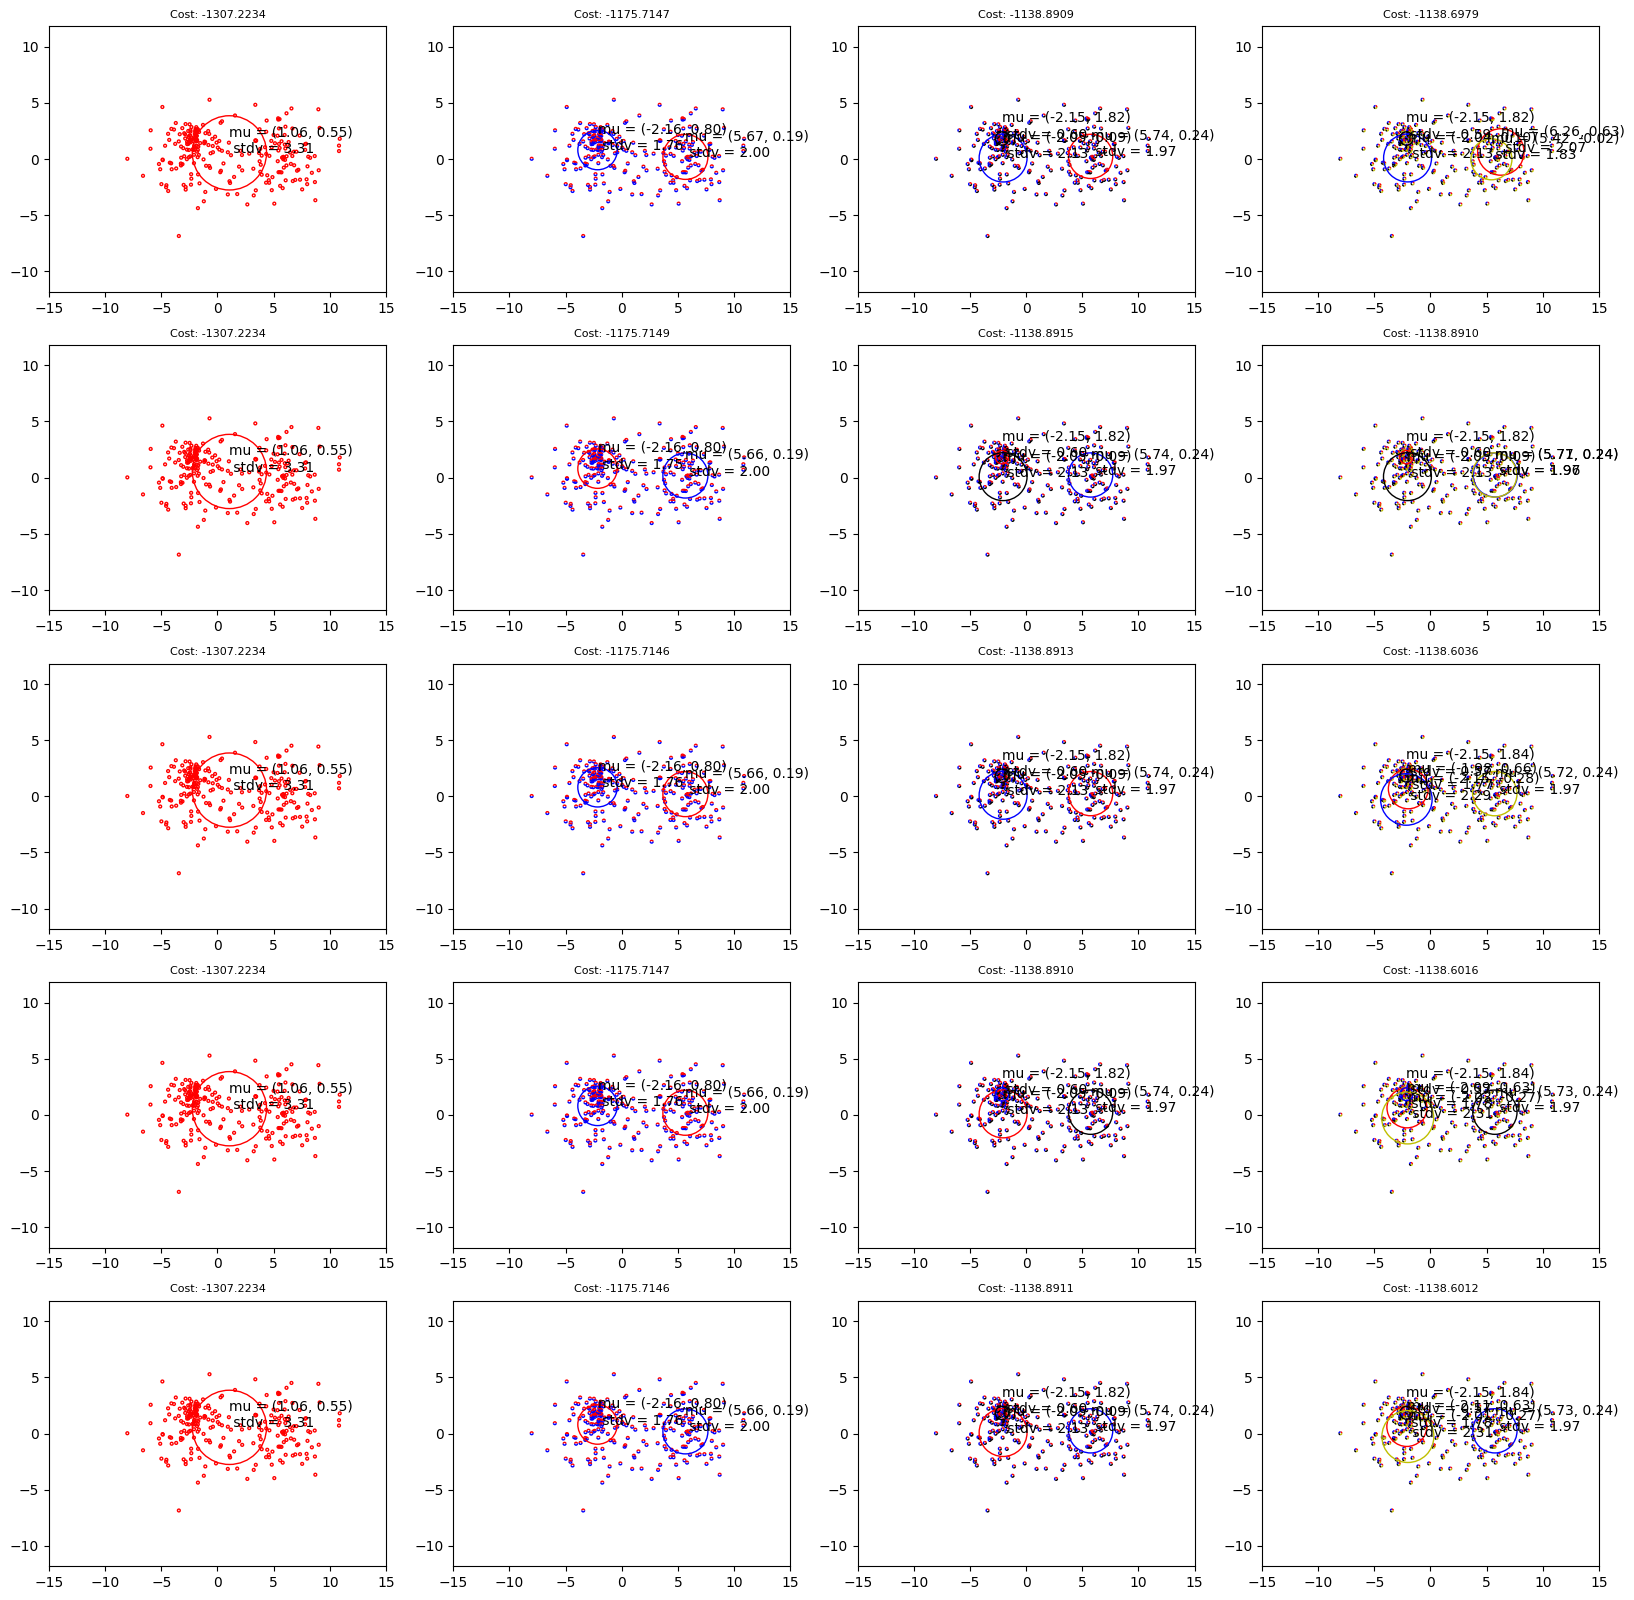

In [69]:
# the task is to use K=range(1, 5) and seed=range(5) and select the one that minimizes the total cost USING MY IMPLEMENTATION OF EM. Here cost is calculated by kmeans.run function
ks = list(range(1,5))
seeds = list(range(5))

fig, axs = plt.subplots(len(seeds), len(ks), figsize=(5*len(ks), 4*len(seeds)))
min_costs = {k: None for k in ks}
min_seeds = {k: None for k in ks}
for seed in seeds:
    for k in ks:
        mixture, post = common.init(X=X, K=k, seed=seed)
        mixture, post, cost = naive_em.run(X, mixture=mixture, post=post)
        print(f'Seed={seed}, K={k}, Cost={cost:.6f}')
        if min_costs[k] is None:
            min_costs[k] = cost
            min_seeds[k] = seed
        elif cost < min_costs[k]:
            min_costs[k] = cost
            min_seeds[k] = seed
        common.plot(X=X, mixture=mixture, post=post, title=f'Cost: {cost:.4f}', ax=axs[seed, k-1])

In [70]:
min_costs

{1: -1307.2234317600933,
 2: -1175.7148637279554,
 3: -1138.891526858204,
 4: -1138.891045633598}

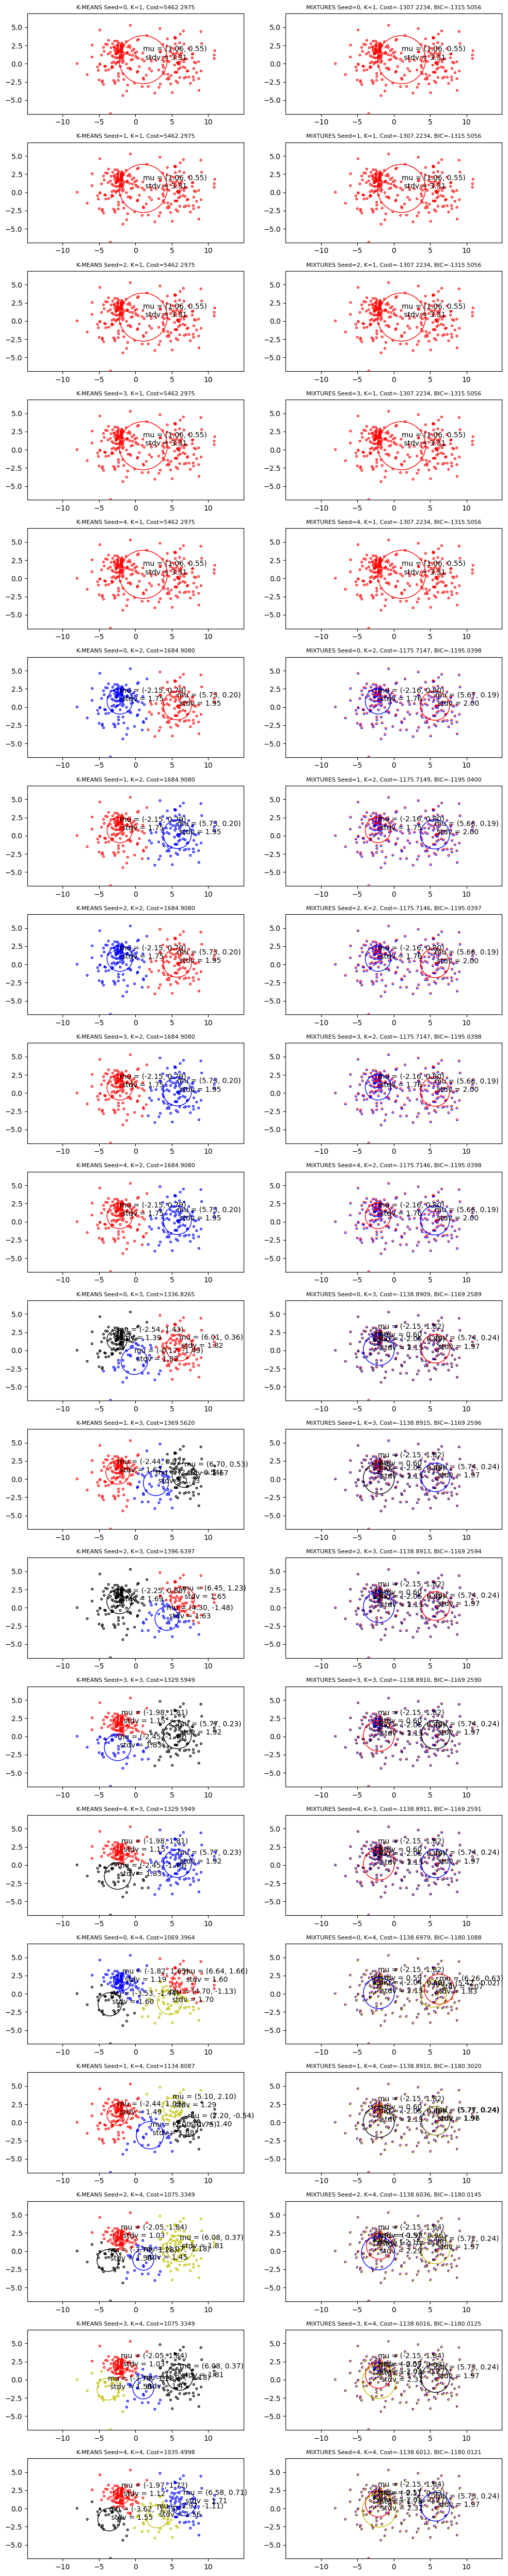

In [71]:
ks = list(range(1,5))
seeds = list(range(5))

fig, axs = plt.subplots(len(seeds)*len(ks), 2, figsize=(10, 50))
r = -1
for k in ks:
    for seed in seeds:
        r += 1
        mixture_init, post_init = common.init(X=X, K=k, seed=seed)
        mixture, post, cost = kmeans.run(X, mixture=mixture_init, post=post_init)
        common.plot(X=X, mixture=mixture, post=post, title=f'K-MEANS Seed={seed}, K={k}, Cost={cost:.4f}', ax=axs[r, 0])
        mixture, post, cost = naive_em.run(X, mixture=mixture_init, post=post_init)
        bic = common.bic(X, mixture=mixture, log_likelihood=cost)
        common.plot(X=X, mixture=mixture, post=post, title=f'MIXTURES Seed={seed}, K={k}, Cost={cost:.4f}, BIC={bic:.4f}', ax=axs[r, 1])
fig.tight_layout()

In [14]:
X = np.array(
    [[0.85794562, 0.84725174],
    [0.6235637,  0.38438171],
    [0.29753461, 0.05671298],
    [0.,         0.47766512],
    [0.,         0.        ],
    [0.3927848,  0.        ],
    [0.,         0.64817187],
    [0.36824154, 0.        ],
    [0.,         0.87008726],
    [0.47360805, 0.        ],
    [0.,         0.        ],
    [0.,         0.        ],
    [0.53737323, 0.75861562],
    [0.10590761, 0.        ],
    [0.18633234, 0.        ]]
)
X

array([[0.85794562, 0.84725174],
       [0.6235637 , 0.38438171],
       [0.29753461, 0.05671298],
       [0.        , 0.47766512],
       [0.        , 0.        ],
       [0.3927848 , 0.        ],
       [0.        , 0.64817187],
       [0.36824154, 0.        ],
       [0.        , 0.87008726],
       [0.47360805, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.53737323, 0.75861562],
       [0.10590761, 0.        ],
       [0.18633234, 0.        ]])

In [15]:
post = np.array(
    [[0.15765074, 0.20544344, 0.17314824, 0.15652173, 0.12169798, 0.18553787],
    [0.1094766,  0.22310587, 0.24109142, 0.0959303,  0.19807563, 0.13232018],
    [0.22679645, 0.36955206, 0.02836173, 0.03478709, 0.00807236, 0.33243031],
    [0.16670188, 0.18637975, 0.20964608, 0.17120102, 0.09886116, 0.16721011],
    [0.04250305, 0.22996176, 0.05151538, 0.33947585, 0.18753121, 0.14901275],
    [0.09799086, 0.28677458, 0.16895715, 0.21054678, 0.0069597,  0.22877093],
    [0.16764519, 0.16897033, 0.25848053, 0.18674186, 0.09846462, 0.11969746],
    [0.28655211, 0.02473762, 0.27387452, 0.27546459, 0.08641467, 0.05295649],
    [0.11353057, 0.13090863, 0.20522811, 0.15786368, 0.35574052, 0.03672849],
    [0.10510461, 0.08116927, 0.3286373,  0.12745369, 0.23464272, 0.12299241],
    [0.09757735, 0.06774952, 0.40286261, 0.08481828, 0.1206645,  0.22632773],
    [0.24899344, 0.02944918, 0.25413459, 0.02914503, 0.29614373, 0.14213403],
    [0.35350682, 0.21890411, 0.26755234, 0.01418274, 0.10235276, 0.04350123],
    [0.15555757, 0.06236572, 0.16703133, 0.21760554, 0.03369562, 0.36374421],
    [0.1917808,  0.08982788, 0.17710673, 0.03179658, 0.19494387, 0.31454414]]
)

In [16]:
indicator = np.where(X > 0, 1, 0)
indicator

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0]])

In [83]:
cluster = 0
coord = 0
denom = post[:, cluster] * indicator[:, coord]
denom

array([0.04381722, 0.16883835, 0.        , 0.        , 0.15376208,
       0.19287175, 0.18422868, 0.        , 0.10470608, 0.01712838,
       0.12519528, 0.        , 0.04994057, 0.20568516, 0.12050695,
       0.14737733])

In [86]:
denom * X[:, coord]

array([0.02142156, 0.15304701, 0.        , 0.        , 0.05127111,
       0.07328207, 0.03838606, 0.        , 0.08283675, 0.00891466,
       0.07257728, 0.        , 0.02928444, 0.07655525, 0.07759455,
       0.11228886])

In [87]:
post[:, cluster] * indicator[:, coord] * X[:, coord]

array([0.02142156, 0.15304701, 0.        , 0.        , 0.05127111,
       0.07328207, 0.03838606, 0.        , 0.08283675, 0.00891466,
       0.07257728, 0.        , 0.02928444, 0.07655525, 0.07759455,
       0.11228886])

In [17]:
mix = GaussianMixture(
    mu=np.array([[0.52670353, 0.55264954],
        [0.52475798, 0.58061036],
        [0.06520449, 0.52659173],
        [0.5512584,  0.53646794],
        [0.55577641, 0.58842622],
        [0.50890252, 0.54576143]]),
    var=np.array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25]),
    p=np.array([0.13686413, 0.11633798, 0.09051395, 0.12235743, 0.14845657, 0.13436464]),
)

In [96]:
mx = naive_em.mstep_for_incomplete(X, post=post, mixture=mix)
print('Mu:', mx.mu, '\nVar:', mx.var, '\nP:', mx.p)

Mu: [[0.41970858 0.57419602]
 [0.46514641 0.50509648]
 [0.45167656 0.64343368]
 [0.41703438 0.53646794]
 [0.55577641 0.58842622]
 [0.35384957 0.44162885]] 
Var: [0.25 0.25 0.25 0.25 0.25 0.25] 
P: [0.1680912  0.15835331 0.21384187 0.14223565 0.14295074 0.17452722]


In [101]:
X

array([[0.85794562, 0.84725174],
       [0.6235637 , 0.38438171],
       [0.29753461, 0.05671298],
       [0.        , 0.47766512],
       [0.        , 0.        ],
       [0.3927848 , 0.        ],
       [0.        , 0.64817187],
       [0.36824154, 0.        ],
       [0.        , 0.87008726],
       [0.47360805, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.53737323, 0.75861562],
       [0.10590761, 0.        ],
       [0.18633234, 0.        ]])

In [104]:
naive_em.estep(X, mixture=mix)

(array([[0.14178502, 0.12404237, 0.03217945, 0.12825316, 0.16600959,
         0.13475377, 0.13652811, 0.13644853],
        [0.14235611, 0.11847454, 0.05226158, 0.12966639, 0.15180076,
         0.13933918, 0.13797254, 0.12812889],
        [0.13959815, 0.11228316, 0.09680508, 0.12578669, 0.1367561 ,
         0.14111708, 0.13463305, 0.11302069],
        [0.1369992 , 0.11529982, 0.09119026, 0.12300963, 0.1466411 ,
         0.13476261, 0.13153107, 0.12056631],
        [0.13686413, 0.11633798, 0.09051395, 0.12235743, 0.14845657,
         0.13436464, 0.13099833, 0.12010697],
        [0.14059119, 0.11962979, 0.07775963, 0.12389753, 0.14988915,
         0.13925778, 0.13343663, 0.11553829],
        [0.13693944, 0.11746843, 0.08954485, 0.12160646, 0.15019771,
         0.13407249, 0.13048588, 0.11968472],
        [0.14032204, 0.11942357, 0.08120793, 0.1233626 , 0.14917582,
         0.13923429, 0.1329865 , 0.11428724],
        [0.13682252, 0.12031763, 0.0874227 , 0.11976987, 0.1549118 ,
         0.

In [103]:
naive_em.f_uj(X[0], mixture=mix)

array([-2.83337286, -2.96706167, -4.31635668, -2.93367871, -2.67563929,
       -2.88423567, -2.87115429, -2.87173739])

In [18]:
posterior, lh = em.estep(X=X, mixture=mix)
print(f'Likelihood (loss): {lh:.6f}')
print(posterior.shape)
posterior[:4]

Likelihood (loss): -10.209295
(15, 6)


array([[0.19502127, 0.17061676, 0.04426193, 0.17640858, 0.22834148,
        0.18534998],
       [0.19397246, 0.16143176, 0.07121091, 0.17668163, 0.20684161,
        0.18986163],
       [0.1855504 , 0.14924399, 0.12867092, 0.16719255, 0.18177282,
        0.18756933],
       [0.18317785, 0.15416421, 0.12192798, 0.1644728 , 0.19606978,
        0.18018738]])

In [3]:
X = np.loadtxt('netflix_incomplete.txt')
X.shape

(1200, 1200)

In [4]:
mixture_init, post_init = common.init(X=X, K=12, seed=1)
print(mixture_init,'\n', post_init.shape)

GaussianMixture(mu=array([[0., 4., 4., ..., 3., 5., 4.],
       [2., 4., 5., ..., 4., 5., 4.],
       [0., 4., 4., ..., 0., 0., 3.],
       ...,
       [2., 4., 5., ..., 4., 3., 0.],
       [0., 4., 5., ..., 5., 5., 4.],
       [1., 3., 5., ..., 4., 4., 2.]]), var=array([5.42300208, 5.47326736, 5.96273681, 5.87800903, 6.49256597,
       5.67215069, 4.87667708, 4.86725069, 5.71165347, 5.83992847,
       7.15746875, 4.49457014]), p=array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])) 
 (1200, 12)


In [5]:
mixture, post, cost = em.run(X, mixture=mixture_init, post=post_init)
post.shape

(1200, 12)

In [6]:
post

array([[0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       ...,
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333]])

In [7]:
mixture

GaussianMixture(mu=array([[3.        , 3.5       , 4.5       , ..., 3.        , 4.        ,
        3.5       ],
       [3.26447147, 4.08061597, 4.76424666, ..., 3.81625297, 4.61607919,
        3.95648291],
       [0.        , 4.        , 4.        , ..., 0.        , 0.        ,
        3.        ],
       ...,
       [2.        , 4.        , 5.        , ..., 4.        , 3.        ,
        0.        ],
       [0.        , 4.        , 5.        , ..., 5.        , 5.        ,
        4.        ],
       [1.94025366, 3.51927817, 4.80022863, ..., 3.80126907, 3.40313322,
        2.84692509]]), var=array([0.25      , 0.64485796, 0.25      , 0.89701336, 0.25      ,
       0.25      , 0.78406888, 0.68969854, 0.25      , 0.25      ,
       0.25      , 0.70107424]), p=array([0.00166667, 0.1648661 , 0.00083333, 0.10608492, 0.00083333,
       0.00083333, 0.22834031, 0.28326725, 0.00083333, 0.00083333,
       0.00083333, 0.21077475]))

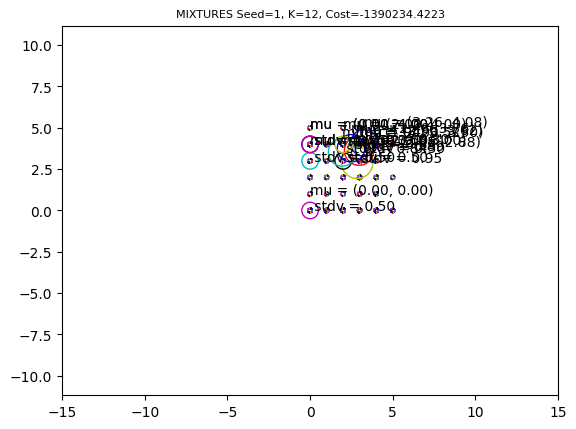

In [8]:
common.plot(X=X, mixture=mixture, post=post, title=f'MIXTURES Seed=1, K=12, Cost={cost:.4f}')

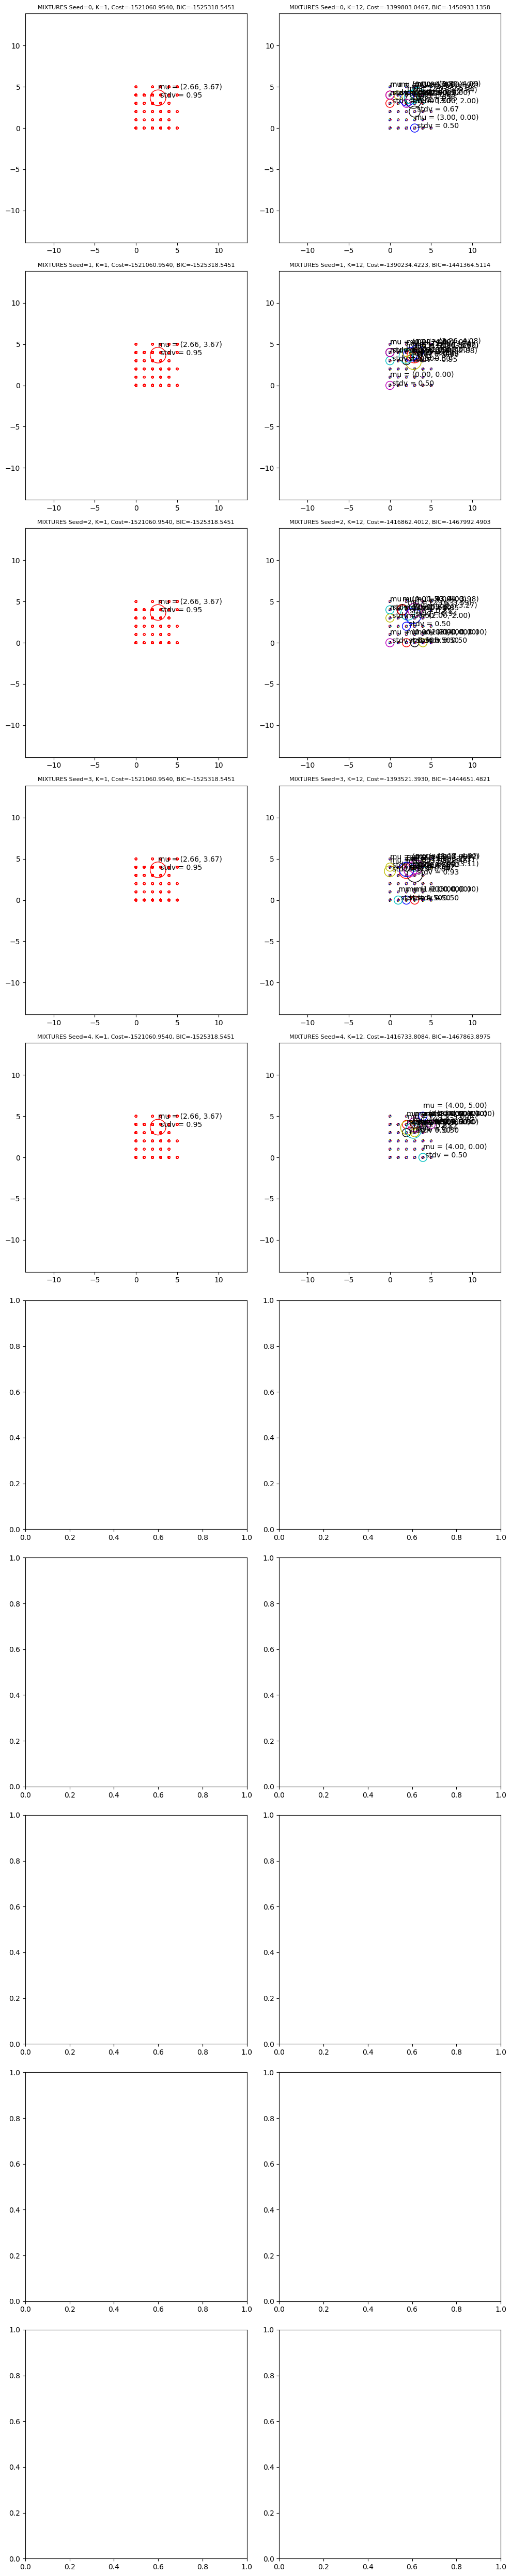

In [32]:
ks = [1, 12]
seeds = list(range(5))

fig, axs = plt.subplots(len(seeds), 2, figsize=(10, 50))
r = -1
for seed in seeds:
    r += 1
    for c, k in enumerate(ks):
        mixture_init, post_init = common.init(X=X, K=k, seed=seed)
        mixture, post, cost = em.run(X, mixture=mixture_init, post=post_init)
        bic = common.bic(X, mixture=mixture, log_likelihood=cost)
        common.plot(X=X, mixture=mixture, post=post, title=f'MIXTURES Seed={seed}, K={k}, Cost={cost:.4f}, BIC={bic:.4f}', ax=axs[r, c])
fig.tight_layout()

In [33]:
X[:5]

array([[2., 4., 5., ..., 4., 4., 4.],
       [3., 5., 5., ..., 5., 3., 4.],
       [2., 0., 4., ..., 4., 4., 3.],
       [4., 3., 4., ..., 4., 4., 4.],
       [2., 2., 5., ..., 4., 0., 0.]])

In [36]:
X[:5].all(axis=1)

array([False, False, False, False, False])

In [44]:
mixture_init, post_init = common.init(X=X, K=12, seed=1)
mixture, post, cost = em.run(X, mixture=mixture_init, post=post_init)

In [45]:
X_test = X[:8]
post_test = post[:8]

In [48]:
fill_value = mixture.mu[np.argmax(post_test, axis=1)]

In [49]:
fill_value

array([[3. , 3.5, 4.5, ..., 3. , 4. , 3.5],
       [3. , 3.5, 4.5, ..., 3. , 4. , 3.5],
       [3. , 3.5, 4.5, ..., 3. , 4. , 3.5],
       ...,
       [3. , 3.5, 4.5, ..., 3. , 4. , 3.5],
       [3. , 3.5, 4.5, ..., 3. , 4. , 3.5],
       [3. , 3.5, 4.5, ..., 3. , 4. , 3.5]])

In [50]:
fill_value.shape

(8, 1200)

In [46]:
np.argmax(post_test, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
post_test

array([[0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333],
       [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333],
       [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333],
       [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333],
       [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333],
       [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333,

In [16]:
X=np.array(
    [[0.,         0.,         0.,         0.33274799],
    [0.,         0.,         0.,         0.        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.56220132, 0.47114337, 0.,        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.,         0.,         0.,        ],
    [0.,         0.56145709, 0.,         0.,        ]]
)
mix = GaussianMixture(
    mu=np.array(
        [[ 0.21507458, -0.51667163, -0.88232042,  0.78720835],
        [ 0.62093766, -0.92492691, -0.79572338,  0.34879557],
        [ 0.41322388, -0.93146297, -0.14052852, -0.74645965],
        [-0.43266828, -0.30896915, -0.40330391,  0.57482166],
        [-0.72221605,  0.41130222, -0.34183862, -0.32657854],
        [-0.48238381, -0.10430246, -0.89560309,  0.74236975]]
    ),
    var=np.array([0.47852827, 0.57314442, 0.48063351, 0.2284311,  0.24063323, 0.43145341]),
    p=np.array([0.19771675, 0.12825617, 0.1374272,  0.19195493, 0.12632759, 0.21831736])
)
# Output:
# X_pred:[[-0.1522036  -0.35748514 -0.64665663  0.33274799]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.44202069  0.56220132  0.47114337  0.0184673 ]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.10065025 -0.37891094 -0.61194393  0.32895178]
#  [-0.40744717  0.56145709 -0.60017466  0.26483908]]

In [9]:
X_gold = np.loadtxt('netflix_complete.txt')

In [10]:
common.rmse(X_gold, em.fill_matrix(X=X, mixture=mixture))

0.4804908505400695